In [59]:
import pandas as pd
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras import regularizers
from keras.layers import Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
def object_to_category(df):
    for label,content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    return df
object_to_category(df)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def label_encoding(df):
    for label,content in df.items():
        if pd.api.types.is_categorical_dtype(content):
            df[label] = le.fit_transform(content)
    return df
label_encoding(df)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.shape

(10000, 11)

In [12]:
df.Gender.value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,0.746300,0.827529,0.00,0.00,0.000,1.0000,2.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [14]:
X= df.drop("Exited",axis=1)
y= df["Exited"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_val.shape,y_val.shape

((6400, 10), (2000, 10), (6400,), (2000,), (1600, 10), (1600,))

In [16]:
mm= MinMaxScaler()
X_train=mm.fit_transform(X_train)
X_test=mm.transform(X_test)
X_val=mm.transform(X_val)

In [17]:
X_train[0:5,1]

array([0.5, 1. , 0.5, 0. , 0.5])

In [94]:
def build_model():
    model = Sequential()
    model.add(Dense(16,activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    return model

In [95]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

In [96]:
churn_model = build_model()
history = churn_model.fit(X_train,y_train,epochs=100,batch_size=16,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/100


400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7930 - loss: 0.5126 - val_accuracy: 0.8025 - val_loss: 0.4501
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8144 - loss: 0.4488 - val_accuracy: 0.8194 - val_loss: 0.4230
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8225 - loss: 0.4285 - val_accuracy: 0.8294 - val_loss: 0.4053
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8250 - loss: 0.4250 - val_accuracy: 0.8438 - val_loss: 0.3890
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8431 - loss: 0.3930 - val_accuracy: 0.8444 - val_loss: 0.3779
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8320 - loss: 0.3954 - val_accuracy: 0.8481 - val_loss: 0.3678
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8490 - loss: 0.3757 - val_accuracy: 0.8581 - val_loss: 0.3468
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8433 - loss: 0.3693 - val_accuracy: 0.8587

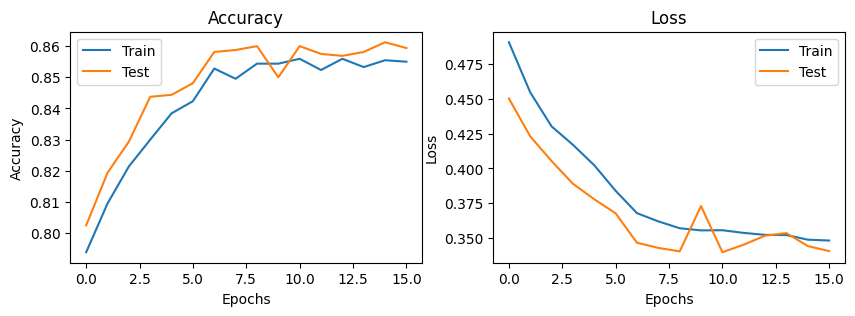

In [100]:
def plot(history):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"],label="Train")
    plt.plot(history.history["val_accuracy"],label="Test")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy")
    
    plt.subplot(1,2,2)
    plt.plot(history.history["loss"],label="Train")
    plt.plot(history.history["val_loss"],label="Test")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss")
    plt.show()
plot(history)


In [98]:
#predict the result
y_pred = churn_model.predict(X_test)
y_pred = (y_pred>0.5).astype(int)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[1566   41]
 [ 241  152]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.79      0.39      0.52       393

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [107]:
df_test = pd.DataFrame({"Actual":y_test,"Predicted":y_pred.flatten()})
df_test[30:40]

,Actual,Predicted
321,0,0
2678,0,0
4625,0,0
4949,0,0
8328,0,0
3337,1,1
5589,1,0
251,0,0
3973,0,0
6630,0,0
